# Indice

### 1- Introduccion - Objetivos

### 1.1 - Conclusiones Finales Generales.

### 2 - EDA / Preprocesamiento

### 2.1 - Analisis inicial de Datos.

### 2.2 - Unificacion de dataset.

### 2.3 - Detección y eliminación de Outliers y valores erroneos

### 2.4 - Valores nulos 

### 2.5 - Escalado de Datos

### 2.6 - Encoding

### 3 - Comparacion por RMSE con resultados del mejor modelo del proyecto 2

### 3.1 - XGboost con df new_properati_Capital1_All_sin_bedrooms_clean_l3_security3

### 3.2 - XGboost con df new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3.

### 3.3 - XGboost con df new_properati_Capital1_All_sin_bedrooms_clean_l3_security3 pero solo con los 6 atributos que utilice en el proyecto2.

### 3.4 - XGboost con df new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3 pero solo con los 6 atributos que utilice en el proyecto2.

### 3.5 - Conclusiones/Resultados del RMSE

### 4 - Reduccion de tiempo de fit/Reduccion de dimensionalidad por PCA

### 4.1 - Conclusiones/Resultados del PCA

### 5 - Conclusiones Generales Finales.
__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________


### 1- Introduccion - Objetivo

#### - El mejor RMSE conseguido en el proyecto2 fue con el modelo XGBoost que utilizaremos aca tambien.

#### - El df con el que se trabajo y que volveremos a utilizar aca es el new_properati_Capital1_All_sin_bedrooms_clean.

#### - En este proyecto intentare mejorar el mejor RMSE conseguido en el proyecto2.

#### - Para eso utilizare un dataset conseguidos en una web del Gobierno de la Ciudad de Buenos Aires (Capital Federal) sobre distintos tipos de delitos cometidos. Intuyo que en los valores de las propiedades influye mucho el nivel de seguridad de los distintos barrios, donde se encuentra el inmueble.

#### - Lo hare con dos df; uno normalizado y el otro no.

#### - Si consigo este objetivo aplicare sobre el modelo que me de mejor resultrado el PCA para hacer una reduccion de dimensionalidad para reducir el tiempo de fit. Tengo en cuenta que al agregar un feature por barrio el df a procesar habra aumentado mucho.

#### - Voy a medir los tiempos de fit.

#### - Los dataset con los que trabajaremos se encuentran en el repositorio https://github.com/FreeAlejandria/Acamica-Proyecto_Properati_Part2


### 1.1 - Conclusiones Finales Generales.

### - La mejora en el RMSE Test de este df del proyecto2, habiendole agregado los atributos de seguridad, fue de un __32%__.

### - Esa mejora en el RMSe Test de un 32 % es igual para el df normalizado o no; (new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3 o new_properati_Capital1_All_sin_bedrooms_clean_l3_security3)

### - Luego del PCA, si bien el tiempo de fit se redujo de 207 a 90 minutos (56%), con 7 componentes, el RMSE de Train con respecto a Test, se amplio de 0.01677 a 0.063167 (270%). Este es el mayor problema ya que muestra un aumento del sobreajuste. Ademas el RMSE Test aumento un 27%;  de 0.33692 a 0.4292.

### 2 - EDA / Preprocesamiento

### 2.1 - Analisis inicial de Datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

seguridad2019= pd.read_csv("delitos_2019.csv")

In [2]:
display(seguridad2019.head())


,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,374556,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,426152,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,371604,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,425359,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,437571,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123


In [3]:
display(seguridad2019.shape)


(117661, 10)

In [4]:
seguridad2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117661 entries, 0 to 117660
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   117661 non-null  int64  
 1   fecha                117661 non-null  object 
 2   franja_horaria       117661 non-null  object 
 3   tipo_delito          117661 non-null  object 
 4   subtipo_delito       11676 non-null   object 
 5   cantidad_registrada  117661 non-null  float64
 6   comuna               117064 non-null  float64
 7   barrio               117064 non-null  object 
 8   lat                  117064 non-null  float64
 9   long                 117064 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 9.0+ MB


In [5]:
seguridad2019.describe()

,id,cantidad_registrada,comuna,lat,long
count,117661.000000,117661.000000,117064.000000,117064.000000,117064.000000
mean,429709.839565,1.000059,7.131868,-34.611337,-58.432901
std,33968.245351,0.007713,4.705622,0.029763,0.042494
min,353583.000000,1.000000,1.000000,-34.703796,-58.531279
25%,400296.000000,1.000000,3.000000,-34.630664,-58.466549
50%,429711.000000,1.000000,7.000000,-34.609089,-58.428872
75%,459126.000000,1.000000,12.000000,-34.592245,-58.397927
max,488541.000000,2.000000,15.000000,-34.528497,-58.343409


#### - Cantidad registrada es siempre un 1.

#### - Valores nulos 

In [6]:
total = seguridad2019.isnull().sum().sort_values(ascending=False)
percent_1 = seguridad2019.isnull().sum()/seguridad2019.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
display(total)
missing_data.head(5)


subtipo_delito         105985
comuna                    597
barrio                    597
lat                       597
long                      597
id                          0
fecha                       0
franja_horaria              0
tipo_delito                 0
cantidad_registrada         0
dtype: int64

,Total,%
subtipo_delito,105985,90.1
comuna,597,0.5
barrio,597,0.5
lat,597,0.5
long,597,0.5


#### - Saco los atributos que no voy a utilizar.

In [7]:
seguridad2019_clean = seguridad2019.drop(["id",'long', 'lat', 'subtipo_delito', 'franja_horaria', 'fecha','comuna'], axis=1)
seguridad2019_clean

,tipo_delito,cantidad_registrada,barrio
0,Lesiones,1.0,Nueva Pompeya
1,Robo (con violencia),1.0,Liniers
2,Lesiones,1.0,Chacarita
3,Hurto (sin violencia),1.0,Floresta
4,Robo (con violencia),1.0,Parque Patricios
...,...,...,...
117656,Robo (con violencia),1.0,Villa Riachuelo
117657,Robo (con violencia),1.0,Boedo
117658,Robo (con violencia),1.0,Monserrat
117659,Robo (con violencia),1.0,Villa Crespo


#### - Clasificacion de tipos de delitos.

In [8]:
tipos_de_delitos=seguridad2019_clean.tipo_delito.unique()
tipos_de_delitos

array(['Lesiones', 'Robo (con violencia)', 'Hurto (sin violencia)',
       'Homicidio'], dtype=object)

Text(0.5, 1.0, 'Cantidad de delitos por Tipo de Delito')

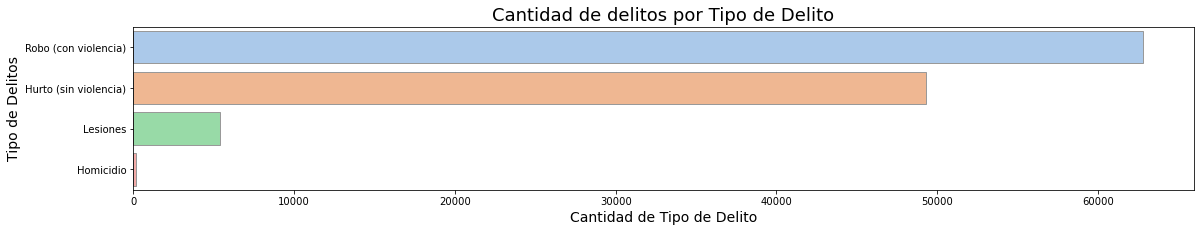

In [9]:
plt.subplots(figsize=(19, 3))
sns.countplot(y="tipo_delito", data=seguridad2019, palette="pastel", edgecolor=".6", 
  order=seguridad2019["tipo_delito"]. value_counts().index)
plt.xlabel('Cantidad de Tipo de Delito',size=14)
plt.ylabel('Tipo de Delitos',size=14)
plt.title('Cantidad de delitos por Tipo de Delito',size=18)


#### - Voy a contar la cantidad de delitos por tipo de delito y por barrio.

In [10]:
seguridad2019_clean1 = seguridad2019_clean.groupby(['barrio','tipo_delito']).cantidad_registrada.sum().astype(int).reset_index(name='count')

In [11]:
seguridad2019_clean1.head(15)

,barrio,tipo_delito,count
0,Agronomía,Homicidio,1
1,Agronomía,Hurto (sin violencia),169
2,Agronomía,Lesiones,45
3,Agronomía,Robo (con violencia),239
4,Almagro,Homicidio,5
5,Almagro,Hurto (sin violencia),1763
6,Almagro,Lesiones,178
7,Almagro,Robo (con violencia),2968
8,Balvanera,Homicidio,7
9,Balvanera,Hurto (sin violencia),4062


Text(0.5, 1.0, 'Cantidad de Delitos (Top 15) por Tipo de Delito y Barrio')

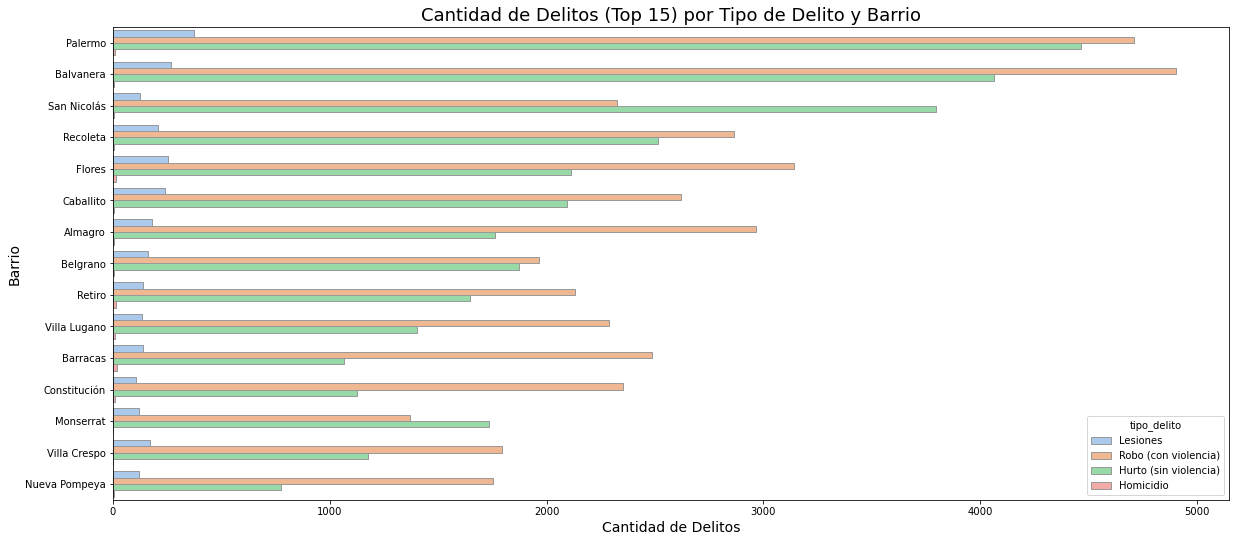

In [12]:
plt.subplots(figsize=(20, 40))
plt.subplot(4,1,2)
sns.countplot(y="barrio", data=seguridad2019, hue="tipo_delito",
              order=seguridad2019.barrio.value_counts().iloc[:15].index,palette="pastel", edgecolor=".6")
plt.xlabel('Cantidad de Delitos',size=14)
plt.ylabel('Barrio',size=14)
plt.title("Cantidad de Delitos (Top 15) por Tipo de Delito y Barrio" ,size=18)

#### - Sirve para darse una idea en cuanto a la proporcion de los tipos de delito por barrio; por ejemplo, si hay un % mayor de robos sin violencia en relacion con robos con violencia y lesiones; pero no es representativo en el panorama total, ya que habria que verlo en relacion al % de habitantes por Barrio, incluso en relacion tambien con el grado de circulacion de personas. Por ejemplo, Retiro tiene un altisimo porcentaje de circulacion durante el dia, pero no muchos habitantes residentes.


#### - Cambiamos la columna "barrio" por "l3" para que coincida el nombre con la columna del df new_properati_Capital1_All_sin_bedrooms_clean (df que viene del proyecto2 y que en breve cargaremos).

In [13]:
seguridad2019_clean1 = seguridad2019_clean1.rename(columns={'barrio':'l3'})
seguridad2019_clean1

,l3,tipo_delito,count
0,Agronomía,Homicidio,1
1,Agronomía,Hurto (sin violencia),169
2,Agronomía,Lesiones,45
3,Agronomía,Robo (con violencia),239
4,Almagro,Homicidio,5
...,...,...,...
182,Villa del Parque,Robo (con violencia),666
183,Vélez Sársfield,Homicidio,1
184,Vélez Sársfield,Hurto (sin violencia),457
185,Vélez Sársfield,Lesiones,57


### 2.2 - Unificacion de dataset

### - Vamos a cargar el  dataset new_properati_Capital1_All_sin_bedrooms_clean.csv que viene del Proyecto2:

> #### - new_properati_Capital1_All_sin_bedrooms_clean: Es un df que tiene todo el EDA realizado pero no tiene el OneHotEncoder en sus variables categoricas, ni la normalizacion. Es el df base que utilice para comenzar a probar distintos modelos en el proyecto2. Tiene toda la limpieza realizada, sin outliers. El detalle para ver como se llega a este df esta en https://github.com/FreeAlejandria/Acamica-Proyecto_Properati_Part2


In [14]:
new_properati_Capital1_All_sin_bedrooms_clean= pd.read_csv("new_properati_Capital1_All_sin_bedrooms_clean.csv")

In [15]:
new_properati_Capital1_All_sin_bedrooms_clean.head(3)

,Unnamed: 0,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH


#### - Unificamos los barrios de los 2 df (seguridad2019 y new_properati_Capital1_All_sin_bedrooms_clean).

#### - Veamos como estan nombrados los barrios en los dos df. Necesitamos verificar si estan escritos igual (tildes, mayusculas) y tambien chequear si falta alguno.

In [16]:
barrios1=seguridad2019_clean.barrio.unique()
display(barrios1)
barrios1.shape

array(['Nueva Pompeya', 'Liniers', 'Chacarita', 'Floresta',
       'Parque Patricios', 'Boca', 'Villa Pueyrredón', 'Barracas',
       'Almagro', 'Palermo', 'Parque Avellaneda', 'Parque Chacabuco',
       'Villa Devoto', 'San Cristóbal', 'Villa Lugano', 'Retiro',
       'Mataderos', 'Villa Crespo', 'Balvanera', 'Recoleta',
       'Villa Soldati', 'Constitución', 'Villa Urquiza', 'Flores',
       'San Telmo', 'Caballito', 'Nuñez', 'Villa Luro', 'Belgrano',
       'Saavedra', 'Puerto Madero', 'Villa Ortuzar', 'San Nicolás',
       'Boedo', 'Monserrat', 'Colegiales', 'Villa del Parque', 'Coghlan',
       'Villa Santa Rita', nan, 'Monte Castro', 'Villa Riachuelo',
       'Villa Gral. Mitre', 'Paternal', 'Agronomía', 'Vélez Sársfield',
       'Parque Chas', 'Villa Real', 'Versalles'], dtype=object)

(49,)

In [17]:
barrios2=new_properati_Capital1_All_sin_bedrooms_clean.l3.unique()
display(barrios2)
barrios2.shape

array(['San Cristobal', 'Boedo', 'Palermo', 'Villa Crespo',
       'Villa Pueyrredón', 'Flores', 'Nuñez', 'Almagro', 'Belgrano',
       'Caballito', 'Colegiales', 'Villa Luro', 'Barrio Norte',
       'Las Cañitas', 'Villa Urquiza', 'Recoleta', 'Chacarita',
       'Parque Centenario', 'Boca', 'Once', 'Retiro', 'Monserrat',
       'San Telmo', 'Villa Ortuzar', 'Parque Chacabuco',
       'Centro / Microcentro', 'Abasto', 'Liniers', 'Floresta',
       'Balvanera', 'San Nicolás', 'Coghlan', 'Saavedra', 'Puerto Madero',
       'Barracas', 'Paternal', 'Mataderos', 'Villa Devoto', 'Congreso',
       'Constitución', 'Villa Santa Rita', 'Agronomía',
       'Parque Avellaneda', 'Tribunales', 'Parque Chas',
       'Velez Sarsfield', 'Villa del Parque', 'Parque Patricios',
       'Villa Real', 'Versalles', 'Villa Lugano', 'Villa General Mitre',
       'Monte Castro', 'Pompeya', 'Villa Riachuelo', 'Villa Soldati',
       'Catalinas'], dtype=object)

(57,)

#### - Como vemos la cantidad de barrios de Capital Federal en el df de los delitos y en el df de las publicaciones de properati, son distintos.

> - En el df de delitos son 49 y en el df de properati son 57. Esto sucede porque en el df de properati hay nombres de barrios que son utilizados __"culturalmente"__ pero que __"legalmente"__ se llaman distinto. Tengamos en cuenta que el df de delitos es de la Ciudad de BsAs y no puede tener nombres coloquiales.

#### - Las correcciones que tendremos que realizar antes de unificar los dos df seran las siguientes:

> - Reemplazar Abasto por Almagro; Barrio Norte por Recoleta; Congreso por Balvanera; Once por Retiro; Pompeya por Nueva Pompeya; Tribunales por San Nicolas; Villa General Mitre por Villa Gral Mitre; Catalinas por Retiro; Centro/Microcentro por Retiro; Las Cañitas por Recoleta; Parque Centenario por Almagro.

In [18]:
new_properati_Capital1_All_sin_bedrooms_clean_l3=pd.DataFrame(new_properati_Capital1_All_sin_bedrooms_clean)
new_properati_Capital1_All_sin_bedrooms_clean_l3.replace({"Abasto":"Almagro", "Barrio Norte":"Recoleta", 
                                                             "Congreso": "Balvanera","Once": "Retiro", "Pompeya": "Nueva Pompeya",
                                                             "Tribunales" : "San Nicolas", "Villa General Mitre" : "Villa Gral Mitre",
                                                             "Catalinas" : "Retiro", "Centro/Microcentro" : "Retiro",
                                                             "Las Cañitas" : "Recoleta", "Parque Centenario" : "Almagro"},inplace=True)

In [19]:
barrios3=new_properati_Capital1_All_sin_bedrooms_clean_l3.l3.unique()
barrios3

array(['San Cristobal', 'Boedo', 'Palermo', 'Villa Crespo',
       'Villa Pueyrredón', 'Flores', 'Nuñez', 'Almagro', 'Belgrano',
       'Caballito', 'Colegiales', 'Villa Luro', 'Recoleta',
       'Villa Urquiza', 'Chacarita', 'Boca', 'Retiro', 'Monserrat',
       'San Telmo', 'Villa Ortuzar', 'Parque Chacabuco',
       'Centro / Microcentro', 'Liniers', 'Floresta', 'Balvanera',
       'San Nicolás', 'Coghlan', 'Saavedra', 'Puerto Madero', 'Barracas',
       'Paternal', 'Mataderos', 'Villa Devoto', 'Constitución',
       'Villa Santa Rita', 'Agronomía', 'Parque Avellaneda',
       'San Nicolas', 'Parque Chas', 'Velez Sarsfield',
       'Villa del Parque', 'Parque Patricios', 'Villa Real', 'Versalles',
       'Villa Lugano', 'Villa Gral Mitre', 'Monte Castro',
       'Nueva Pompeya', 'Villa Riachuelo', 'Villa Soldati'], dtype=object)

In [20]:
barrios3.shape

(50,)

#### - Es correcto; antes teniamos 57 nombres y ahora tenemos 50. Fueron 7 los nombres modificados. Hay 5 barrios que fueron reemplazados por 2 nombres (Retiro y Recoleta). Por ejemplo Catalinas y Barrio Norte fueron reemplazados por Retiro.

#### - Ahora vamos a unir los dos df. Al df new_properati_Capital1_All_sin_bedrooms_clean_l3 le vamos a agregar las columnas "tipo_delito" y "count" del df seguridad2019_clean1.

In [21]:
new_properati_Capital1_All_sin_bedrooms_clean_l3_security=pd.merge(new_properati_Capital1_All_sin_bedrooms_clean_l3,seguridad2019_clean1)

In [22]:
new_properati_Capital1_All_sin_bedrooms_clean_l3_security.head()

,Unnamed: 0,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,tipo_delito,count
0,1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Homicidio,2
1,1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Hurto (sin violencia),710
2,1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Lesiones,90
3,1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Robo (con violencia),1004
4,11,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento,Homicidio,2


In [23]:
new_properati_Capital1_All_sin_bedrooms_clean_l3_security=new_properati_Capital1_All_sin_bedrooms_clean_l3_security.drop(["Unnamed: 0"], axis=1)
new_properati_Capital1_All_sin_bedrooms_clean_l3_security.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,tipo_delito,count
0,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Homicidio,2
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Hurto (sin violencia),710
2,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Lesiones,90
3,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Robo (con violencia),1004
4,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento,Homicidio,2


In [24]:
new_properati_Capital1_All_sin_bedrooms_clean_l3_security.columns

Index(['l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type', 'tipo_delito', 'count'],
      dtype='object')

In [25]:
display(seguridad2019_clean1.shape)
display(new_properati_Capital1_All_sin_bedrooms_clean_l3.shape)
new_properati_Capital1_All_sin_bedrooms_clean_l3_security.shape

(187, 3)

(50112, 9)

(194929, 10)

#### - Ahora si me interesa ver la correlacion con los nuevos atributos incluidos.

In [26]:
new_properati_Capital1_All_sin_bedrooms_clean_l3_security.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,count
rooms,1.000000,0.942286,0.455395,0.666393,0.739731,0.432883,0.006003
bedrooms,0.942286,1.000000,0.455758,0.645674,0.725732,0.414541,0.005355
bathrooms,0.455395,0.455758,1.000000,0.519984,0.572683,0.554011,0.014937
surface_total,0.666393,0.645674,0.519984,1.000000,0.886575,0.626244,-0.018171
surface_covered,0.739731,0.725732,0.572683,0.886575,1.000000,0.665295,0.009550
price,0.432883,0.414541,0.554011,0.626244,0.665295,1.000000,0.062305
count,0.006003,0.005355,0.014937,-0.018171,0.009550,0.062305,1.000000


Text(0.5, 1.0, 'new_properati_Capital1_All_sin_bedrooms_clean_l3_security')

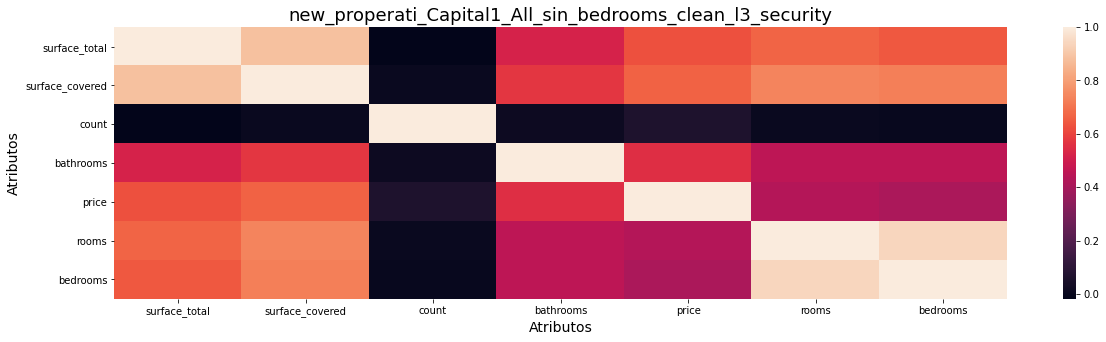

In [27]:
plt.subplots(figsize=(20,5))

sns.heatmap(new_properati_Capital1_All_sin_bedrooms_clean_l3_security[["surface_total","surface_covered","count", "bathrooms","price","rooms","bedrooms"]].corr())
plt.ylabel("Atributos",size=14)
plt.xlabel("Atributos",size=14)
plt.title("new_properati_Capital1_All_sin_bedrooms_clean_l3_security" ,size=18)

#### - Se mantienen las correlaciones ya vistas en el proyecto 2 pero "count" no tiene ninguna correlacion con las otras variables numericas.

In [28]:
new_properati_Capital1_All_sin_bedrooms_clean_l3_security.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194929 entries, 0 to 194928
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   l3               194929 non-null  object 
 1   rooms            194929 non-null  float64
 2   bedrooms         194929 non-null  float64
 3   bathrooms        194929 non-null  float64
 4   surface_total    194929 non-null  float64
 5   surface_covered  194929 non-null  float64
 6   price            194929 non-null  float64
 7   property_type    194929 non-null  object 
 8   tipo_delito      194929 non-null  object 
 9   count            194929 non-null  int32  
dtypes: float64(6), int32(1), object(3)
memory usage: 15.6+ MB


### 2.3 - Detección y eliminación de Outliers y valores erroneos.

#### - Veamos la distribucion del atributo "count"

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribucion atributo count')

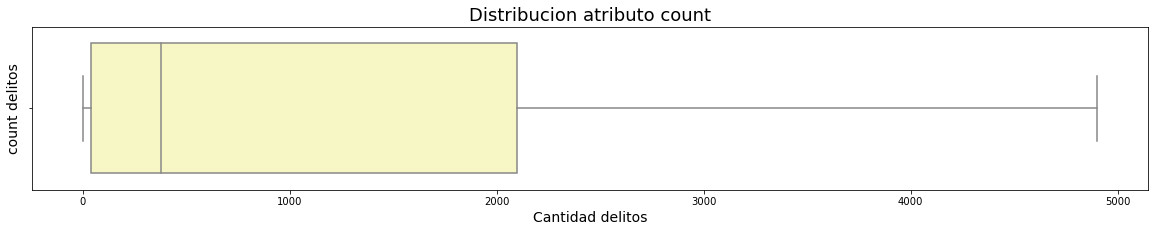

In [29]:
plt.subplots(figsize=(20, 3))
sns.boxplot(new_properati_Capital1_All_sin_bedrooms_clean_l3_security["count"],palette="Spectral",orient="h")
plt.xlabel('Cantidad delitos',size=14)
plt.ylabel('count delitos',size=14)
plt.title("Distribucion atributo count" ,size=18)

### - No hay outliers para extraer.

### 2.4 - Valores nulos 

In [30]:
new_properati_Capital1_All_sin_bedrooms_clean_l3_security.isnull().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
tipo_delito        0
count              0
dtype: int64

#### - Despues de la unificacion de los dos df, ya no tengo mas ese 0.5% de nulos en el atributo "barrio"

### 2.5 - Escalado de Datos

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler_Standard=StandardScaler()

scaler_Standard.fit(new_properati_Capital1_All_sin_bedrooms_clean_l3_security[["surface_total","surface_covered", "bathrooms",
                                                                               "price","rooms","bedrooms","count"]])
new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado= scaler_Standard.transform(new_properati_Capital1_All_sin_bedrooms_clean_l3_security[["surface_total",
"surface_covered", "bathrooms","price","rooms","bedrooms","count"]])

df=pd.DataFrame(new_properati_Capital1_All_sin_bedrooms_clean_l3_security)
display(df.shape)
display(df.head(3))

df2=pd.DataFrame(new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado)
display(df2.shape)
df2.head(3)


(194929, 10)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,tipo_delito,count
0,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Homicidio,2
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Hurto (sin violencia),710
2,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Lesiones,90


(194929, 7)

,0,1,2,3,4,5,6
0,-0.494619,-0.62544,0.716538,-0.753836,-1.208912,-1.299634,-0.823205
1,-0.494619,-0.62544,0.716538,-0.753836,-1.208912,-1.299634,-0.340353
2,-0.494619,-0.62544,0.716538,-0.753836,-1.208912,-1.299634,-0.763190


In [32]:
new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado2=pd.DataFrame(new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado)
new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado2=pd.DataFrame(new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado,index=new_properati_Capital1_All_sin_bedrooms_clean_l3_security[["surface_total","surface_covered", 
                                                                                                  "bathrooms","price","rooms","bedrooms","count"]].index,
               columns=new_properati_Capital1_All_sin_bedrooms_clean_l3_security[["surface_total","surface_covered", 
                                                                                                  "bathrooms","price","rooms","bedrooms","count"]].columns)

In [33]:
new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado2.head().round(5)

,surface_total,surface_covered,bathrooms,price,rooms,bedrooms,count
0,-0.49462,-0.62544,0.71654,-0.75384,-1.20891,-1.29963,-0.82321
1,-0.49462,-0.62544,0.71654,-0.75384,-1.20891,-1.29963,-0.34035
2,-0.49462,-0.62544,0.71654,-0.75384,-1.20891,-1.29963,-0.76319
3,-0.49462,-0.62544,0.71654,-0.75384,-1.20891,-1.29963,-0.13985
4,-0.55382,-0.59016,-0.77143,-0.86666,-1.20891,-1.29963,-0.82321


#### - Al df new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado2 lo creo desde el df new_properati_Capital1_All_sin_bedrooms_clean_l3_security asignandole los valores del new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado; este ultimo ya reescalado por el metodo Standar_Scaler.

In [34]:
display(new_properati_Capital1_All_sin_bedrooms_clean_l3_security.describe().round(5))
new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado2.describe().round(5)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,count
count,194929.00000,194929.00000,194929.00000,194929.00000,194929.00000,194929.00000,194929.00000
mean,3.10350,2.08013,1.51845,86.71085,75.72844,225815.51924,1209.05531
std,0.91281,0.83111,0.67206,33.78541,28.34564,88634.26824,1466.29104
min,1.00000,0.00000,1.00000,45.00000,35.00000,114500.00000,1.00000
25%,2.00000,1.00000,1.00000,60.00000,54.00000,157354.00000,38.00000
50%,3.00000,2.00000,1.00000,78.00000,69.00000,200000.00000,376.00000
75%,4.00000,3.00000,2.00000,104.00000,90.00000,270000.00000,2096.00000
max,7.00000,12.00000,4.00000,203.00000,173.00000,515000.00000,4902.00000


,surface_total,surface_covered,bathrooms,price,rooms,bedrooms,count
count,194929.00000,194929.00000,194929.00000,194929.00000,194929.00000,194929.00000,194929.00000
mean,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-1.23458,-1.43685,-0.77143,-1.25590,-2.30444,-2.50285,-0.82389
25%,-0.79060,-0.76656,-0.77143,-0.77241,-1.20891,-1.29963,-0.79865
50%,-0.25783,-0.23737,-0.77143,-0.29126,-0.11339,-0.09642,-0.56814
75%,0.51174,0.50348,0.71654,0.49850,0.98214,1.10680,0.60489
max,3.44200,3.43163,3.69247,3.26268,4.26872,11.93576,2.51857


#### - En todos los atributos sus medias y std se vieron mejoradas acercandose a 0 y 1 respectivamente.

### 2.6 - Encoding

#### - Vamos a hacer un dummies para transformar las variables "unique" categoricas (string) de los atributos "property_type", "l3" y "tipo_delito" en variables dummies (int). Lo haremos en los dos df que vamos a utilizar. new_properati_Capital1_All_sin_bedrooms_clean_l3_security que sera sin normalizar y el new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado2 que esta normalizado.

In [35]:
dummies = pd.get_dummies(new_properati_Capital1_All_sin_bedrooms_clean_l3_security[["property_type","l3","tipo_delito"]])
new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3 = pd.concat([new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado2, dummies], axis=1)
new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3.head(5)

,surface_total,surface_covered,bathrooms,price,rooms,bedrooms,count,property_type_Casa,property_type_Departamento,property_type_PH,...,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,tipo_delito_Homicidio,tipo_delito_Hurto (sin violencia),tipo_delito_Lesiones,tipo_delito_Robo (con violencia)
0,-0.494619,-0.625440,0.716538,-0.753836,-1.208912,-1.299634,-0.823205,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.494619,-0.625440,0.716538,-0.753836,-1.208912,-1.299634,-0.340353,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.494619,-0.625440,0.716538,-0.753836,-1.208912,-1.299634,-0.763190,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-0.494619,-0.625440,0.716538,-0.753836,-1.208912,-1.299634,-0.139847,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,-0.553816,-0.590161,-0.771430,-0.866659,-1.208912,-1.299634,-0.823205,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
dummies2 = pd.get_dummies(new_properati_Capital1_All_sin_bedrooms_clean_l3_security[["property_type","l3","tipo_delito"]])
new_properati_Capital1_All_sin_bedrooms_clean_l3_security2 = pd.concat([new_properati_Capital1_All_sin_bedrooms_clean_l3_security, dummies], axis=1)
new_properati_Capital1_All_sin_bedrooms_clean_l3_security3=pd.DataFrame(new_properati_Capital1_All_sin_bedrooms_clean_l3_security2)
new_properati_Capital1_All_sin_bedrooms_clean_l3_security3.head(5)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,tipo_delito,count,...,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,tipo_delito_Homicidio,tipo_delito_Hurto (sin violencia),tipo_delito_Lesiones,tipo_delito_Robo (con violencia)
0,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Homicidio,2,...,0,0,0,0,0,0,1,0,0,0
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Hurto (sin violencia),710,...,0,0,0,0,0,0,0,1,0,0
2,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Lesiones,90,...,0,0,0,0,0,0,0,0,1,0
3,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Robo (con violencia),1004,...,0,0,0,0,0,0,0,0,0,1
4,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento,Homicidio,2,...,0,0,0,0,0,0,1,0,0,0


In [37]:
display(new_properati_Capital1_All_sin_bedrooms_clean_l3_security3.columns)
new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3.columns

Index(['l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type', 'tipo_delito', 'count',
       'property_type_Casa', 'property_type_Departamento', 'property_type_PH',
       'l3_Agronomía', 'l3_Almagro', 'l3_Balvanera', 'l3_Barracas',
       'l3_Belgrano', 'l3_Boca', 'l3_Boedo', 'l3_Caballito', 'l3_Chacarita',
       'l3_Coghlan', 'l3_Colegiales', 'l3_Constitución', 'l3_Flores',
       'l3_Floresta', 'l3_Liniers', 'l3_Mataderos', 'l3_Monserrat',
       'l3_Monte Castro', 'l3_Nueva Pompeya', 'l3_Nuñez', 'l3_Palermo',
       'l3_Parque Avellaneda', 'l3_Parque Chacabuco', 'l3_Parque Chas',
       'l3_Parque Patricios', 'l3_Paternal', 'l3_Puerto Madero', 'l3_Recoleta',
       'l3_Retiro', 'l3_Saavedra', 'l3_San Nicolás', 'l3_San Telmo',
       'l3_Versalles', 'l3_Villa Crespo', 'l3_Villa Devoto', 'l3_Villa Lugano',
       'l3_Villa Luro', 'l3_Villa Ortuzar', 'l3_Villa Pueyrredón',
       'l3_Villa Real', 'l3_Villa Riachuelo', 'l3_Villa Sa

Index(['surface_total', 'surface_covered', 'bathrooms', 'price', 'rooms',
       'bedrooms', 'count', 'property_type_Casa', 'property_type_Departamento',
       'property_type_PH', 'l3_Agronomía', 'l3_Almagro', 'l3_Balvanera',
       'l3_Barracas', 'l3_Belgrano', 'l3_Boca', 'l3_Boedo', 'l3_Caballito',
       'l3_Chacarita', 'l3_Coghlan', 'l3_Colegiales', 'l3_Constitución',
       'l3_Flores', 'l3_Floresta', 'l3_Liniers', 'l3_Mataderos',
       'l3_Monserrat', 'l3_Monte Castro', 'l3_Nueva Pompeya', 'l3_Nuñez',
       'l3_Palermo', 'l3_Parque Avellaneda', 'l3_Parque Chacabuco',
       'l3_Parque Chas', 'l3_Parque Patricios', 'l3_Paternal',
       'l3_Puerto Madero', 'l3_Recoleta', 'l3_Retiro', 'l3_Saavedra',
       'l3_San Nicolás', 'l3_San Telmo', 'l3_Versalles', 'l3_Villa Crespo',
       'l3_Villa Devoto', 'l3_Villa Lugano', 'l3_Villa Luro',
       'l3_Villa Ortuzar', 'l3_Villa Pueyrredón', 'l3_Villa Real',
       'l3_Villa Riachuelo', 'l3_Villa Santa Rita', 'l3_Villa Soldati',
       

### 3 - Comparacion por RMSE con resultados del mejor modelo del proyecto 2

### 3.1 - XGboost con df new_properati_Capital1_All_sin_bedrooms_clean_l3_security3, con todos los atributos categoricos (barrios, tipo de delito y tipo de propiedad)

#### - Recordemos que es el df sin normalizar, pero si con encoding de atributos categoricos.

In [38]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import time

In [39]:
import xgboost as xgb


X = new_properati_Capital1_All_sin_bedrooms_clean_l3_security3[[ "bathrooms","surface_covered","surface_total", 'count',
       'property_type_Casa', 'property_type_Departamento', 'property_type_PH',
       'l3_Agronomía', 'l3_Almagro', 'l3_Balvanera', 'l3_Barracas',
       'l3_Belgrano', 'l3_Boca', 'l3_Boedo', 'l3_Caballito', 'l3_Chacarita',
       'l3_Coghlan', 'l3_Colegiales', 'l3_Constitución', 'l3_Flores',
       'l3_Floresta', 'l3_Liniers', 'l3_Mataderos', 'l3_Monserrat',
       'l3_Monte Castro', 'l3_Nueva Pompeya', 'l3_Nuñez', 'l3_Palermo',
       'l3_Parque Avellaneda', 'l3_Parque Chacabuco', 'l3_Parque Chas',
       'l3_Parque Patricios', 'l3_Paternal', 'l3_Puerto Madero', 'l3_Recoleta',
       'l3_Retiro', 'l3_Saavedra', 'l3_San Nicolás', 'l3_San Telmo',
       'l3_Versalles', 'l3_Villa Crespo', 'l3_Villa Devoto', 'l3_Villa Lugano',
       'l3_Villa Luro', 'l3_Villa Ortuzar', 'l3_Villa Pueyrredón',
       'l3_Villa Real', 'l3_Villa Riachuelo', 'l3_Villa Santa Rita',
       'l3_Villa Soldati', 'l3_Villa Urquiza', 'l3_Villa del Parque','tipo_delito_Homicidio', 'tipo_delito_Hurto (sin violencia)',
       'tipo_delito_Lesiones', 'tipo_delito_Robo (con violencia)']]

y =new_properati_Capital1_All_sin_bedrooms_clean_l3_security3[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [40]:
model_xgb_r=xgb.XGBRegressor(booster="gbtree",silent=True,randomstate=42)

parameters_xgb={"n_estimators":[100,200,400,600],
                "gamma":[0.2,0.4,0.6,0.8],
                "learning_rate":[0.05,0.1],
                "n_estimators":[100,200,400,600],
                "max_depth":[4,8,10.15]}


grid = GridSearchCV(estimator=model_xgb_r, param_grid=parameters_xgb,cv=7,n_jobs=-5)


In [41]:
t = time.process_time()

grid.fit(X_train, y_train)

elapsed_time = time.process_time() - t

print(elapsed_time)

KeyboardInterrupt: 

In [ ]:
y_train_pred_8= grid.predict(X_train)
y_test_pred_8= grid.predict(X_test) 

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_8))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_8))

print('RMSE sobre el train set: ', rmse_train)
print('RMSE sobre el test set: ', rmse_test)

### 3.2 - XGboost con df new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3, con todos los atributos categoricos (barrios, tipo de delito y tipo de propiedad)

#### - Recordemos que es el df normalizado y con el encoding en los atributos categoricos que vamos a analizar.

In [ ]:
import xgboost as xgb


X = new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3[[ "bathrooms","surface_covered","surface_total", 'count',
       'property_type_Casa', 'property_type_Departamento', 'property_type_PH',
       'l3_Agronomía', 'l3_Almagro', 'l3_Balvanera', 'l3_Barracas',
       'l3_Belgrano', 'l3_Boca', 'l3_Boedo', 'l3_Caballito', 'l3_Chacarita',
       'l3_Coghlan', 'l3_Colegiales', 'l3_Constitución', 'l3_Flores',
       'l3_Floresta', 'l3_Liniers', 'l3_Mataderos', 'l3_Monserrat',
       'l3_Monte Castro', 'l3_Nueva Pompeya', 'l3_Nuñez', 'l3_Palermo',
       'l3_Parque Avellaneda', 'l3_Parque Chacabuco', 'l3_Parque Chas',
       'l3_Parque Patricios', 'l3_Paternal', 'l3_Puerto Madero', 'l3_Recoleta',
       'l3_Retiro', 'l3_Saavedra', 'l3_San Nicolás', 'l3_San Telmo',
       'l3_Versalles', 'l3_Villa Crespo', 'l3_Villa Devoto', 'l3_Villa Lugano',
       'l3_Villa Luro', 'l3_Villa Ortuzar', 'l3_Villa Pueyrredón',
       'l3_Villa Real', 'l3_Villa Riachuelo', 'l3_Villa Santa Rita',
       'l3_Villa Soldati', 'l3_Villa Urquiza', 'l3_Villa del Parque','tipo_delito_Homicidio', 'tipo_delito_Hurto (sin violencia)',
       'tipo_delito_Lesiones', 'tipo_delito_Robo (con violencia)']]

y =new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
model_xgb_r=xgb.XGBRegressor(booster="gbtree",silent=True,randomstate=42)

parameters_xgb={"n_estimators":[100,200,400,600],
                "gamma":[0.2,0.4,0.6,0.8],
                "learning_rate":[0.05,0.1],
                "n_estimators":[100,200,400,600],
                "max_depth":[4,8,10.15]}


grid = GridSearchCV(estimator=model_xgb_r, param_grid=parameters_xgb,cv=7,n_jobs=-5)


In [ ]:
t = time.process_time()

grid.fit(X_train, y_train)

elapsed_time = time.process_time() - t

print(elapsed_time)

In [ ]:
y_train_pred_8= grid.predict(X_train)
y_test_pred_8= grid.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_8))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_8))

print('RMSE sobre el train set: ', rmse_train)
print('RMSE sobre el test set: ', rmse_test)

### 3.3 - XGboost con df new_properati_Capital1_All_sin_bedrooms_clean_l3_security3 pero solo con los 6 atributos que utilice en el proyecto2 (solo categorico el tipo de propiedad).

In [ ]:
X = new_properati_Capital1_All_sin_bedrooms_clean_l3_security3[[ "bathrooms","surface_covered","surface_total", 
       'property_type_Casa', 'property_type_Departamento', 'property_type_PH']]

y =new_properati_Capital1_All_sin_bedrooms_clean_l3_security3[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model_xgb_r=xgb.XGBRegressor(booster="gbtree",silent=True,randomstate=42)

parameters_xgb={"n_estimators":[100,200,400,600],
                "gamma":[0.2,0.4,0.6,0.8],
                "learning_rate":[0.05,0.1],
                "n_estimators":[100,200,400,600],
                "max_depth":[4,8,10.15]}


grid = GridSearchCV(estimator=model_xgb_r, param_grid=parameters_xgb,cv=7,n_jobs=-5)


In [ ]:
t = time.process_time()

grid.fit(X_train, y_train)

elapsed_time = time.process_time() - t

print(elapsed_time)

In [ ]:
y_train_pred_8= grid.predict(X_train)
y_test_pred_8= grid.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_8))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_8))

print('RMSE sobre el train set: ', rmse_train)
print('RMSE sobre el test set: ', rmse_test)

In [ ]:
importancias_features=grid.best_estimator_.feature_importances_
print(importancias_features)
#Orden X = data_premiun1[[ "bathrooms","surface_covered","surface_total"]]

### 3.4 - XGboost con df new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3 pero solo con los 6 atributos que utilice en el proyecto2 (solo categorico el tipo de propiedad).

In [ ]:
import xgboost as xgb


X = new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3[[ "bathrooms","surface_covered","surface_total", 
       'property_type_Casa', 'property_type_Departamento', 'property_type_PH']]

y =new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
model_xgb_r=xgb.XGBRegressor(booster="gbtree",silent=True,randomstate=42)

parameters_xgb={"n_estimators":[100,200,400,600],
                "gamma":[0.2,0.4,0.6,0.8],
                "learning_rate":[0.05,0.1],
                "n_estimators":[100,200,400,600],
                "max_depth":[4,8,10.15]}


grid = GridSearchCV(estimator=model_xgb_r, param_grid=parameters_xgb,cv=7,n_jobs=-5)


In [ ]:
t = time.process_time()

grid.fit(X_train, y_train)

elapsed_time = time.process_time() - t

print(elapsed_time)

In [ ]:
y_train_pred_8= grid.predict(X_train)
y_test_pred_8= grid.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_8))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_8))

print('RMSE sobre el train set: ', rmse_train)
print('RMSE sobre el test set: ', rmse_test)

In [ ]:
importancias_features=grid.best_estimator_.feature_importances_
print(importancias_features)
#Orden X = data_premiun1[[ "bathrooms","surface_covered","surface_total"]]

### 3.5 - Conclusiones/Resultados del RMSE

#### - Viendo las diferencias entre los RMSE de Train y Test no hay una diferencia que nos "avise" de una sobreajuste.

#### - La mejora en el RMSE Test de este df del proyecto 2, habiendole agregado los atributos de seguridad, fue de un __32%__

## 1) Df - __new_properati_Capital1_All_sin_bedrooms_clean_l3_security3__

### - La mejora en el RMSE Test de este df del proyecto 2 habiendole agregado los atributos de seguridad fue de un __32%__

>#### a) - __Atributos:__ "bathrooms","surface_covered","surface_total",'property_type_Casa', 'property_type_Departamento'y 'property_type_PH'
>
>Raíz del error cuadrático medio en Train: __42833.09__
>
>Raíz del error cuadrático medio en Test: __43901.70__
>
>Diferencia entre RMSE Train y Test: __1068__
>
>Tiempo de fit: 46 minutos.

>#### b) - __Atributos:__ "bathrooms","surface_covered","surface_total", 'count','property_type_Casa', 'property_type_Departamento', 'property_type_PH','l3_Agronomía', 'l3_Almagro', 'l3_Balvanera', 'l3_Barracas',l3_Belgrano', 'l3_Boca', 'l3_Boedo', 'l3_Caballito', 'l3_Chacarita','l3_Coghlan', 'l3_Colegiales', 'l3_Constitución', 'l3_Flores','l3_Floresta', 'l3_Liniers', 'l3_Mataderos', 'l3_Monserrat','l3_Monte Castro', 'l3_Nueva Pompeya', 'l3_Nuñez', 'l3_Palermo','l3_Parque Avellaneda', 'l3_Parque Chacabuco', 'l3_Parque Chas','l3_Parque Patricios', 'l3_Paternal', 'l3_Puerto Madero', 'l3_Recoleta','l3_Retiro', 'l3_Saavedra', 'l3_San Nicolás', 'l3_San Telmo','l3_Versalles', 'l3_Villa Crespo', 'l3_Villa Devoto', 'l3_Villa Lugano',    'l3_Villa Luro', 'l3_Villa Ortuzar', 'l3_Villa Pueyrredón','l3_Villa Real', 'l3_Villa Riachuelo', 'l3_Villa Santa Rita','l3_Villa Soldati', 'l3_Villa Urquiza', 'l3_Villa del Parque','tipo_delito_Homicidio', 'tipo_delito_Hurto (sin violencia)', 'tipo_delito_Lesiones' y 'tipo_delito_Robo (con violencia.
>
>Raíz del error cuadrático medio en Train: __28329.31__
>
>Raíz del error cuadrático medio en Test: __29805.83__
>
>Diferencia entre RMSE Train y Test: __1476__
>
>Tiempo de fit: __194 minutos.__

## 2) Df - __new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3__

### - La mejora en el RMSE Test de este df del proyecto 2 habiendole agregado los atributos de seguridad fue de un __32%__

>#### a) - __Atributos:__ "bathrooms","surface_covered","surface_total",'property_type_Casa', 'property_type_Departamento'y 'property_type_PH'
>
>Raíz del error cuadrático medio en Train: __0.48641__
>
>Raíz del error cuadrático medio en Test: __0.49824__
>
>Diferencia entre RMSE Train y Test: __0.01183__
>
>Tiempo de fit: __48 minutos__

>#### b) - __Atributos:__ "bathrooms","surface_covered","surface_total", 'count','property_type_Casa', 'property_type_Departamento', 'property_type_PH','l3_Agronomía', 'l3_Almagro', 'l3_Balvanera', 'l3_Barracas',l3_Belgrano', 'l3_Boca', 'l3_Boedo', 'l3_Caballito', 'l3_Chacarita','l3_Coghlan', 'l3_Colegiales', 'l3_Constitución', 'l3_Flores','l3_Floresta', 'l3_Liniers', 'l3_Mataderos', 'l3_Monserrat','l3_Monte Castro', 'l3_Nueva Pompeya', 'l3_Nuñez', 'l3_Palermo','l3_Parque Avellaneda', 'l3_Parque Chacabuco', 'l3_Parque Chas','l3_Parque Patricios', 'l3_Paternal', 'l3_Puerto Madero', 'l3_Recoleta','l3_Retiro', 'l3_Saavedra', 'l3_San Nicolás', 'l3_San Telmo','l3_Versalles', 'l3_Villa Crespo', 'l3_Villa Devoto', 'l3_Villa Lugano',    'l3_Villa Luro', 'l3_Villa Ortuzar', 'l3_Villa Pueyrredón','l3_Villa Real', 'l3_Villa Riachuelo', 'l3_Villa Santa Rita','l3_Villa Soldati', 'l3_Villa Urquiza', 'l3_Villa del Parque','tipo_delito_Homicidio', 'tipo_delito_Hurto (sin violencia)', 'tipo_delito_Lesiones' y 'tipo_delito_Robo (con violencia.
>
>Raíz del error cuadrático medio en Train: __0.32015__
>
>Raíz del error cuadrático medio en Test: __0.33692__
>
>Diferencia entre RMSE Train y Test: __0.01677__
>
>Tiempo de fit: __207 minutos__

### 4 - Reduccion de tiempo de fit/Reduccion de dimensionalidad por PCA

#### - Voy a intentar hacer una reduccion de dimensionalidad con el modelo de PCA para intetar bajar los tiempos de fit sin empeorar significativamente en los valores de RMSE y sin aumentar el sobreajuste.

In [ ]:
from sklearn.decomposition import PCA

X = new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3[[ "bathrooms","surface_covered","surface_total", 'count',
       'property_type_Casa', 'property_type_Departamento', 'property_type_PH',
       'l3_Agronomía', 'l3_Almagro', 'l3_Balvanera', 'l3_Barracas',
       'l3_Belgrano', 'l3_Boca', 'l3_Boedo', 'l3_Caballito', 'l3_Chacarita',
       'l3_Coghlan', 'l3_Colegiales', 'l3_Constitución', 'l3_Flores',
       'l3_Floresta', 'l3_Liniers', 'l3_Mataderos', 'l3_Monserrat',
       'l3_Monte Castro', 'l3_Nueva Pompeya', 'l3_Nuñez', 'l3_Palermo',
       'l3_Parque Avellaneda', 'l3_Parque Chacabuco', 'l3_Parque Chas',
       'l3_Parque Patricios', 'l3_Paternal', 'l3_Puerto Madero', 'l3_Recoleta',
       'l3_Retiro', 'l3_Saavedra', 'l3_San Nicolás', 'l3_San Telmo',
       'l3_Versalles', 'l3_Villa Crespo', 'l3_Villa Devoto', 'l3_Villa Lugano',
       'l3_Villa Luro', 'l3_Villa Ortuzar', 'l3_Villa Pueyrredón',
       'l3_Villa Real', 'l3_Villa Riachuelo', 'l3_Villa Santa Rita',
       'l3_Villa Soldati', 'l3_Villa Urquiza', 'l3_Villa del Parque','tipo_delito_Homicidio', 'tipo_delito_Hurto (sin violencia)',
       'tipo_delito_Lesiones', 'tipo_delito_Robo (con violencia)']]

y =new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
pca = PCA(n_components=7)
X_nuevo = pca.fit_transform(X) 

In [ ]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.3, random_state=42)



In [ ]:
model_xgb_r=xgb.XGBRegressor(booster="gbtree",silent=True,randomstate=42)

parameters_xgb={"n_estimators":[100,200,400,600],
                "gamma":[0.2,0.4,0.6,0.8],
                "learning_rate":[0.05,0.1],
                "n_estimators":[100,200,400,600],
                "max_depth":[4,8,10.15]}


grid = GridSearchCV(estimator=model_xgb_r, param_grid=parameters_xgb,cv=7,n_jobs=-5)


In [ ]:
t = time.process_time()

grid.fit(X_train, y_train)

elapsed_time = time.process_time() - t

print(elapsed_time)

In [ ]:
y_train_pred_8= grid.predict(X_train)
y_test_pred_8= grid.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_8))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_8))

print('RMSE sobre el train set: ', rmse_train)
print('RMSE sobre el test set: ', rmse_test)

### 4.1 - Conclusiones/Resultados del PCA

#### - Si bien el tiempo de fit se redujo de 207 a 90 minutos (56%), el RMSE de Train __con respecto__ a Test se amplio de 0.01677 a 0.063167 (270%). __Este es el mayor problema ya que muestra un aumento del sobreajuste.__

#### - El RMSE train aumento un 16%; de 0.32015 a 0.3919.

#### - El RMSE test aumento un 29%;  de 0.33692 a 0.4447.


### 5 - Conclusiones Generales Finales.

#### - La mejora en el RMSE Test de este df del proyecto2, habiendole agregado los atributos de seguridad, fue de un __32%__.

#### - Esa mejora en el RMSe Test de un 32 % es igual para el df normalizado o no; (new_properati_Capital1_All_sin_bedrooms_clean_l3_security_normalizado3 o new_properati_Capital1_All_sin_bedrooms_clean_l3_security3)

#### - Luego del PCA, si bien el tiempo de fit se redujo de 207 a 90 minutos (56%), con 7 componentes, el RMSE de Train con respecto a Test, se amplio de 0.01677 a 0.063167 (270%). Este es el mayor problema ya que muestra un aumento del sobreajuste. Ademas el RMSE Test aumento un 27%;  de 0.33692 a 0.4292. Para un analisis futuro se podria seguir analizando con __distinto numero de componentes e hiperparametros del modelo.__